In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

<Axes: ylabel='count'>

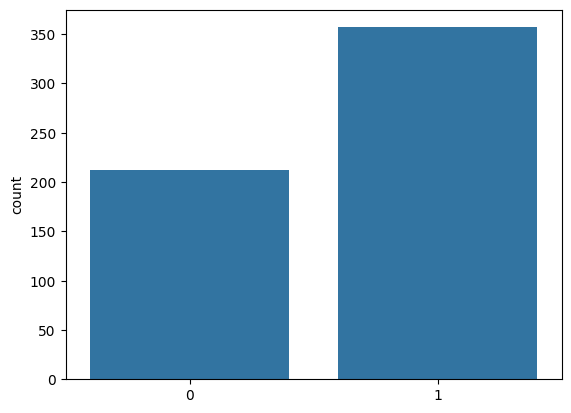

In [6]:
sns.countplot(x = cancer['target'])

In [7]:
from sklearn.model_selection import train_test_split

X = cancer['data']
y = cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [9]:
dt.score(X_test, y_test)

0.9649122807017544

In [10]:
y_pred = dt.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, y_pred)

0.9649122807017544

In [11]:
confusion_matrix(y_test, y_pred)

array([[38,  0],
       [ 4, 72]])

In [12]:
ss = X_test[0]
dt.predict([ss])

array([1])

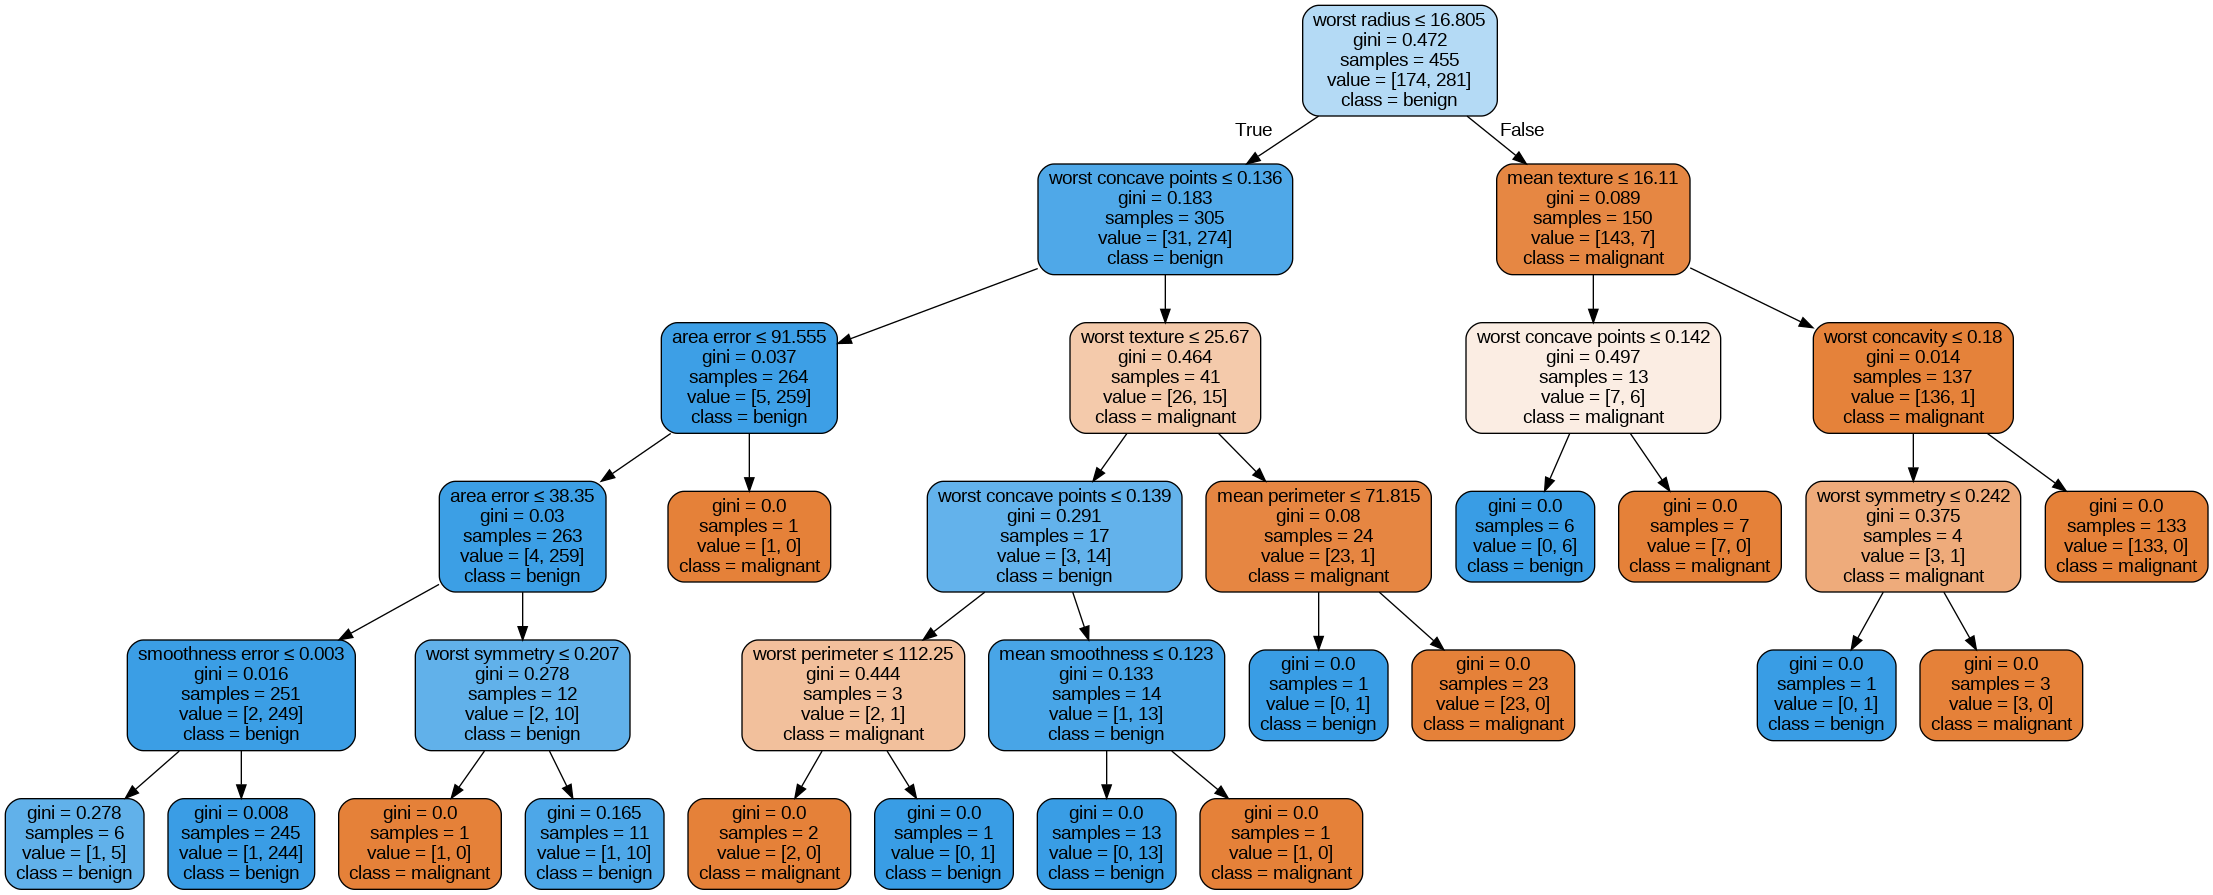

Decision Tree Visualized (see output above)


In [13]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image, display

dot_data = export_graphviz(
    dt,
    out_file = None,
    feature_names = cancer.feature_names,
    class_names = cancer.target_names,
    filled = True,
    rounded = True,
    special_characters = True
)

graph = graphviz.Source(dot_data)

if 'google.colab' in str(get_ipython()):
  display(Image(graph.pipe(format = 'png')))
else:
  graph

graph.render('breast_cancer_tree')

print('Decision Tree Visualized (see output above)')

# Hyperparameters Tuning


Grid Search CV

In [14]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [15]:
param_grid = {'max_depth': [3, None],
              'max_features': [1, 3, 10],
              'min_samples_split': [2, 3, 10],
              'criterion': ['gini', 'entropy']}

In [16]:
clf = DecisionTreeClassifier()

grid_search = GridSearchCV(clf, param_grid = param_grid, cv = 5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]})

In [17]:
grid_search.best_score_

np.float64(0.9508306163639186)

In [18]:
final = grid_search.best_estimator_
final

DecisionTreeClassifier(criterion='entropy', max_features=10,
                       min_samples_split=10)

Random Search CV


In [19]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['label'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [20]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
clf = DecisionTreeClassifier()

param_dist = {'max_depth': [3, None],
              'max_features': range(1, 11),
              'min_samples_split': range(2, 11),
              'criterion': ['gini', 'entropy']}

In [22]:
random_search = RandomizedSearchCV(clf, param_distributions = param_dist, n_iter = 10, cv = 5)
random_search.fit(x, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': range(1, 11),
                                        'min_samples_split': range(2, 11)})

In [23]:
random_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=7,
                       min_samples_split=10)

In [24]:
random_search.best_params_

{'min_samples_split': 10,
 'max_features': 7,
 'max_depth': 3,
 'criterion': 'entropy'}

In [25]:
random_search.best_score_

np.float64(0.9402732494954199)